In [2]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# variable information 
print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

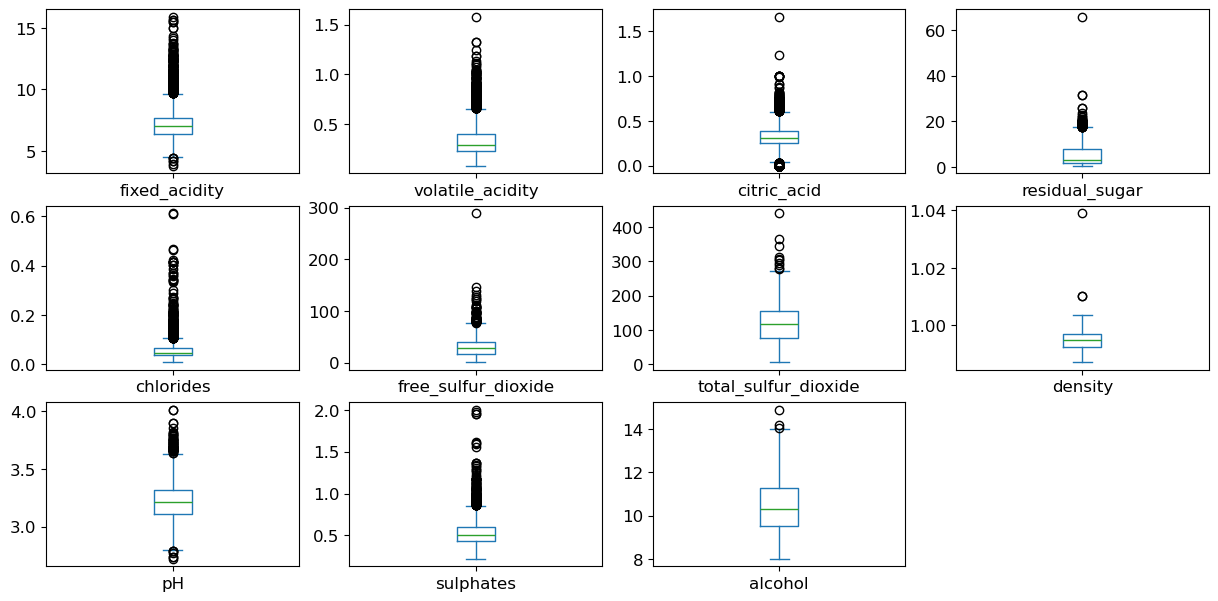

In [20]:
data_mean = X.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

<Axes: >

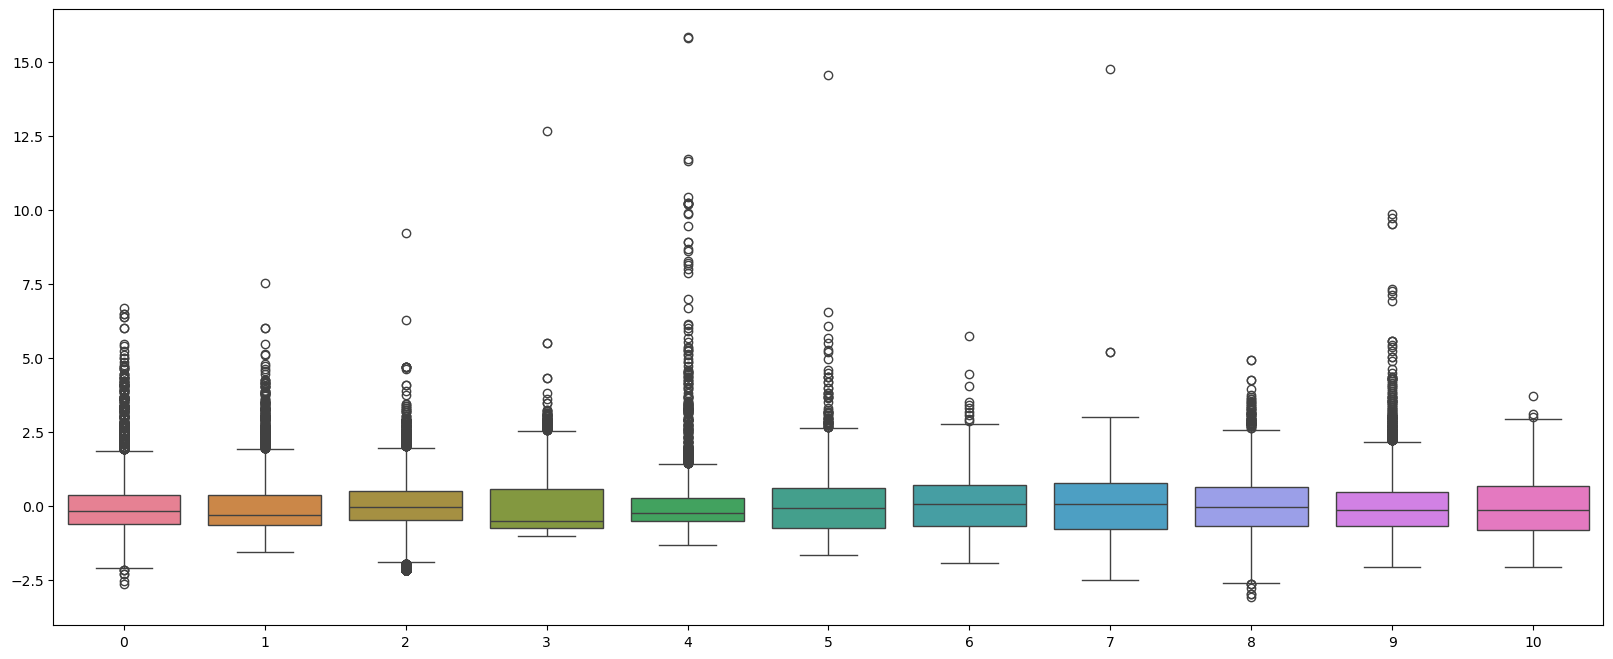

In [4]:
# Standardize features by removing the mean and scaling to unit variance. Xmean = (X-u)/s (standard deviation)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Print features normalised (Xs)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [12]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y.values.ravel(), test_size=0.2,
random_state=1, stratify=y)

# Dimensionality Reduction using PCA to reduce features to 6 components
pca = PCA(n_components=6)
pca.fit(Xs_train)

Xs_train = pca.transform(Xs_train)
Xs_test = pca.transform(Xs_test)

In [16]:
# SVM for classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

kernel_list = ['rbf', 'poly', 'linear']
C_values_list = [1, 10, 20, 50, 100]

hyper_parameter_score_list = []

# K fold value
n_folds = 4

for kernel in kernel_list:
    for c in C_values_list:
        # avoid computational expensive poly and linear svm
        if (kernel == "poly" or kernel == "linear") and c > 20: break
        svm_clf = SVC(C=c, kernel=kernel, degree=3, gamma='auto')
        scores = cross_validate(svm_clf, Xs_train, y_train, cv=n_folds, scoring="accuracy")
        mean_scores = np.mean(scores['test_score'])
        hyper_parameter_score_list.append([kernel, c, mean_scores])

optimal_hyper_parameter = max(hyper_parameter_score_list, key=lambda x: x[2])
print("Optimal Hyper Parameter from list:")
print(optimal_hyper_parameter[:2])

svm_clf = SVC(C=optimal_hyper_parameter[1], kernel=optimal_hyper_parameter[0], degree=3, gamma='auto')
svm_clf.fit(Xs_train, y_train)
scores = cross_val_score(svm_clf, Xs_train, y_train, cv=n_folds)
classifier_score = svm_clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average fold score and standard deviation: (%.2f +- %.3f)%%" %avg)


Optimal Hyper Parameter from list:
['rbf', 10]
The classifier accuracy score is 0.58
Average fold score and standard deviation: (56.53 +- 0.234)%
